In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('data/processed_dataset.csv')
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,x
0,365.557527,1335.757057,182800.750816,621.329382,1335.056746,184897.736676,1929.143451,1339.442472,182189.972772,19594.846200,...,0.000000,0.000000,21701.798045,1341.313287,425.609255,1341.313287,181143.237622,0.000000,0.000000,0
1,383.630242,1338.051100,185263.016689,643.508749,1343.111554,179394.175863,1953.630364,1344.719713,176069.204781,19633.267292,...,0.000000,0.000000,22963.287017,1341.376388,425.313054,1341.376388,180891.194210,0.000000,0.000000,0
2,161.171251,1289.108527,148890.944034,272.817589,1291.789855,145610.524769,850.608208,1295.862676,141072.680486,8698.360527,...,0.000001,0.000003,25333.628562,1228.267621,235.430296,1229.732699,55427.424500,0.147639,0.000485,1
3,165.591681,1287.269215,145583.630014,274.950726,1286.338594,148125.083665,846.251248,1289.109749,147033.406716,8704.393559,...,0.000810,0.000110,20723.730033,1227.319510,238.450080,1228.786133,56858.440901,0.822104,0.001935,0
4,234.994309,1314.244602,128445.734620,346.191343,1306.450249,132996.334678,922.300793,1299.199175,137920.137637,8768.091350,...,0.000000,0.000000,26989.384104,1335.300024,426.099863,1336.647356,181561.093502,0.000000,0.000000,1


# Globals

In [3]:
def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_pred)
    metrics['F1-Score'] = f1_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    
    return metrics

metrics_table = list()

# Model building

### Train-test split

In [4]:
# Split the dataset into training and testing sets
X = df.drop(['x'], axis=1) # features
y = df['x'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature selection

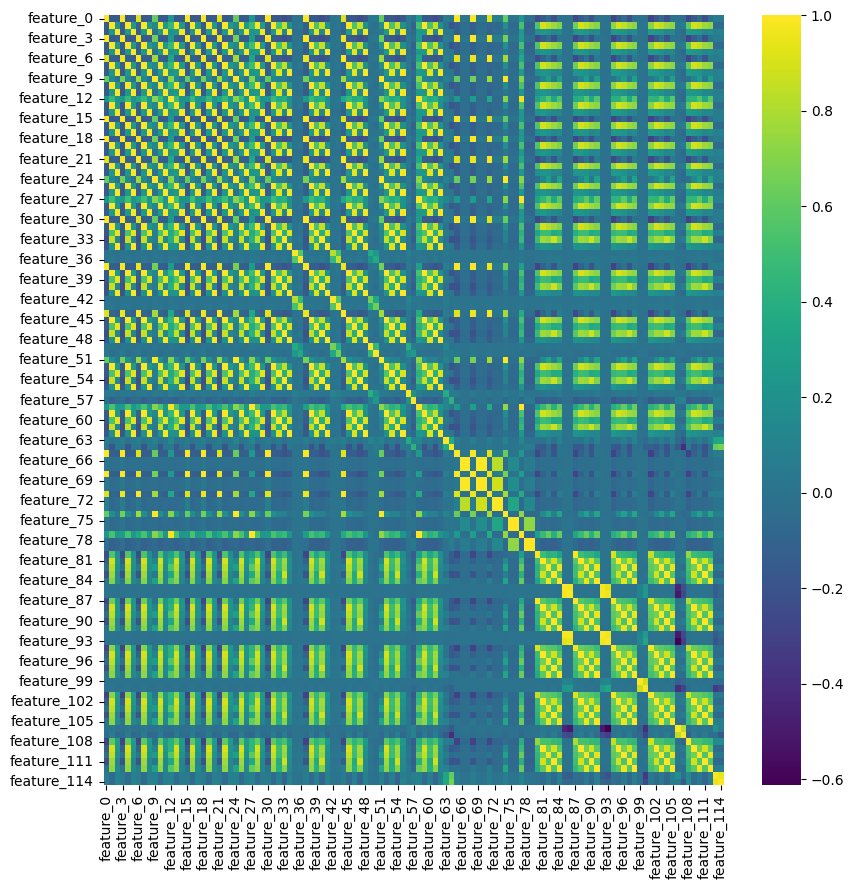

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), cmap='viridis')
plt.show()

In [6]:
num_features = 50

selector = SelectKBest(f_classif, k=num_features)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

### Decision Tree Classifier

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    #'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [8]:
'''
# Create an instance of the model with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_dt = best_dt.predict(X_test)

# Get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)


# Display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])
'''

'\n# Create an instance of the model with the best parameters\nbest_dt = DecisionTreeClassifier(**grid_search.best_params_)\n\n# Train the model on the training data\nbest_dt.fit(X_train, y_train)\n\n# Calculate predictions on Model\ny_pred_dt = best_dt.predict(X_test)\n\n# Get the Performance metrics by method created above\nmetric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)\n\n# Add metric to global list for conclusive evaluation\nmetrics_table.append(metric_dt)\n\n\n# Display metric dictionary in df\npd.DataFrame.from_dict(metric_dt, orient=\'index\', columns=[\'Value\'])\n'